In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/Users/saide/Desktop/study/python_upskill/ml_algorithms/data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [5]:
df = df.replace("?", np.nan)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0


In [6]:
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    float64
 4   chol        271 non-null    float64
 5   fbs         286 non-null    float64
 6   restecg     293 non-null    float64
 7   thalach     293 non-null    float64
 8   exang       293 non-null    float64
 9   oldpeak     294 non-null    float64
 10  slope       104 non-null    float64
 11  ca          3 non-null      float64
 12  thal        28 non-null     float64
 13  num         294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [7]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [8]:
df = df.drop(columns=['slope', 'ca', 'thal'])
df.isnull().sum()

age            0
sex            0
cp             0
trestbps       1
chol          23
fbs            8
restecg        1
thalach        1
exang          1
oldpeak        0
num            0
dtype: int64

In [9]:
df = df.fillna(df.median())
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64

In [10]:
[col for col in df.columns if 'num' in col.lower()]

['num       ']

In [11]:
X = df.drop(columns=['num       '])  
y = df['num       '] 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
class LightGBMTree:
    def __init__(self, max_leaves=6, lam=1.0):
        self.max_leaves = max_leaves
        self.lam = lam
        self.splits = []  

    def fit(self, X, grad, hess):
        n_samples = X.shape[0]
        regions = [np.arange(n_samples)]

        for _ in range(self.max_leaves - 1):
            best_gain = -float("inf")
            best_split = None

            for region in regions:
                G = np.sum(grad[region])
                H = np.sum(hess[region])

                for feature in range(X.shape[1]):
                    thresholds = np.unique(X[region, feature])

                    for threshold in thresholds:
                        left_mask = X[region, feature] <= threshold
                        right_mask = ~left_mask

                        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                            continue

                        left_idx = region[left_mask]
                        right_idx = region[right_mask]

                        G_L = np.sum(grad[left_idx])
                        H_L = np.sum(hess[left_idx])
                        G_R = G - G_L
                        H_R = H - H_L

                        gain = (
                            (G_L**2) / (H_L + self.lam)
                            + (G_R**2) / (H_R + self.lam)
                            - (G**2) / (H + self.lam)
                        )

                        if gain > best_gain:
                            best_gain = gain
                            best_split = (region, feature, threshold, left_idx, right_idx)

            if best_split is None:
                break

            region, feature, threshold, left_idx, right_idx = best_split
            for i, r in enumerate(regions):
                if r is region:
                    regions.pop(i)
                    break

            regions.append(left_idx)
            regions.append(right_idx)
            w_left = -np.sum(grad[left_idx]) / (np.sum(hess[left_idx]) + self.lam)
            w_right = -np.sum(grad[right_idx]) / (np.sum(hess[right_idx]) + self.lam)
            self.splits.append((feature, threshold, w_left, w_right))

    def predict(self, X):
        preds = np.zeros(X.shape[0])
        for feature, threshold, w_left, w_right in self.splits:
            left_mask = X[:, feature] <= threshold
            right_mask = ~left_mask
            preds[left_mask] += w_left
            preds[right_mask] += w_right
        return preds

In [15]:
class LightGBMClassifierScratch:
    def __init__(
        self,
        n_estimators=50,
        learning_rate=0.1,
        max_leaves=6,
        lam=1.0
    ):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_leaves = max_leaves
        self.lam = lam
        self.models = []
        self.init_pred = None

    def sigmoid(self, x):
        x = np.clip(x, -20, 20)
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        y = np.array(y)
        pos_ratio = np.clip(np.mean(y), 1e-6, 1 - 1e-6)
        self.init_pred = np.log(pos_ratio / (1 - pos_ratio))
        F = np.full(len(y), self.init_pred)
        for _ in range(self.n_estimators):
            p = self.sigmoid(F)
            grad = p - y
            hess = p * (1 - p)
            tree = LightGBMTree(
                max_leaves=self.max_leaves,
                lam=self.lam
            )
            tree.fit(X, grad, hess)
            update = tree.predict(X)
            F += self.learning_rate * update
            self.models.append(tree)

    def predict_proba(self, X):
        F = np.full(X.shape[0], self.init_pred)
        for tree in self.models:
            F += self.learning_rate * tree.predict(X)
        return self.sigmoid(F)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)

In [16]:
lgbm = LightGBMClassifierScratch(
    n_estimators=30,
    learning_rate=0.1,
    max_leaves=6,
    lam=1.0
)
lgbm.fit(X_train_scaled, y_train.values)
y_pred_lgbm = lgbm.predict(X_test_scaled)
y_prob_lgbm = lgbm.predict_proba(X_test_scaled)


In [17]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)


In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Precision:", precision_score(y_test, y_pred_lgbm))
print("Recall:", recall_score(y_test, y_pred_lgbm))
print("F1 Score:", f1_score(y_test, y_pred_lgbm))


Accuracy: 0.8135593220338984
Precision: 0.7272727272727273
Recall: 0.7619047619047619
F1 Score: 0.7441860465116279


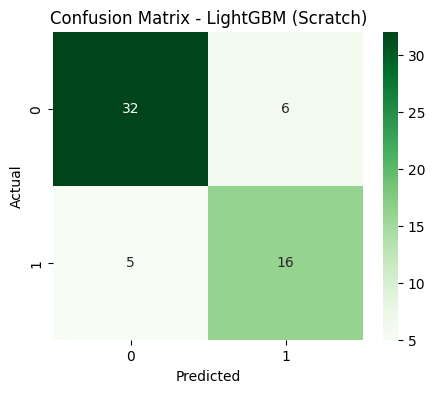

In [19]:
cm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - LightGBM (Scratch)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

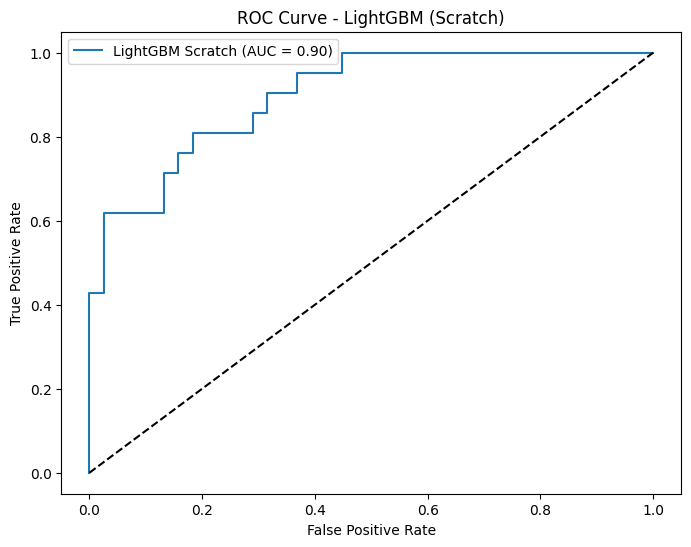

In [20]:
y_prob_lgbm = lgbm.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_prob_lgbm)
roc_auc_lgbm = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"LightGBM Scratch (AUC = {roc_auc_lgbm:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM (Scratch)")
plt.legend()
plt.show()